# 차원 축소(Dimension Reduction)
- 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 차원이 증가할수록 데이터 간의 거리가 기하급수적으로 멀어지고, 희소(sparse)한 구조(차원의 저주)
![image](https://cdn-images-1.medium.com/max/1600/0*iC_4D-LTTRUiZJeM.png)


- 선형 회귀같은 모형에서 피처가 많아질수록 다중공선성의 위험도 높아짐
- 따라서 다차원의 피처를 차원 축소해 피처 수를 줄이면 직관적으로 데이터 해석 가능

![image](10.jpg)

## 피처 선택(feature selection)
- 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거
- 데이터의 특징을 잘 나타내는 주요 피처만 선택

![image](캡처4.jpg)




## 피처 추출(feature extraction)
- 저차원의 중요 피처로 압축해서 추출
- 기존의 피처와는 완전히 다른 값
- 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
- 잠재적인 요소를 추출(latent factor)
- PCA, SVD, NMF
- ex) 학생 평가 요소인 모의고사 성적, 내신 성적, 수능성적, 봉사, 대외활동 => 학업 성취도,커뮤니케이션 능력 등과 같은 함축적 요약 특성으로 추출 가능

![image](캡처5.jpg)

# PCA(Principal Component Analysis)
- 여러 변수 간 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소
- 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

![image](캡쳐6.jpg)

![image](https://miro.medium.com/max/796/1*H38t3YUv_QktLwalzDYRRg.png)

1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값을 계산
3. 고유값이 가장 큰 수능로 K개만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

# 고유값(eigenvalue), 고유벡터(eigenvector)
- 고유벡터 : 행렬 A를 선형변환으로 봤을 때, 선형변환 A에 의한 변환 결과가 자기 자신의 상수배가 되는 0이 아닌 벡터를 고유벡터
- 고유값 : 이 상수배 값을 고유값

![image](1.jpg)
![image](2.jpg)

![image](캡쳐7.jpg)

- 고유값 분해를 이용한 대각화(eigendecomposition)
![image](3.jpg)
![image](4.jpg)
![image](5.jpg) ![image](7.jpg)

- 공분산 행렬은 정방행렬이며 대칭행렬이다
![image](8.jpg)

- 대칭행렬에서는 고유벡터를 직교행렬로, 고유값을 정방행렬로 대각화 할 수 있다
![image](9.jpg)

=> 즉, 공분산 C는 고유벡터 직교행렬 * 고유값 정방행렬 * 고유벡터 직교행렬의 전치행렬로 분해

=> e1는 가장 분산이 큰 방향을 가진 고유벡터이며, e2는 e1에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터

# PCA step

![image](https://miro.medium.com/max/796/1*H38t3YUv_QktLwalzDYRRg.png)
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값을 계산
3. 고유값이 가장 큰 수능로 K개만큼 고유벡터 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환

# iris example

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

In [18]:
# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [19]:
#0 : setosa / 1 : versicolor / 2 : virginica
irisDF.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

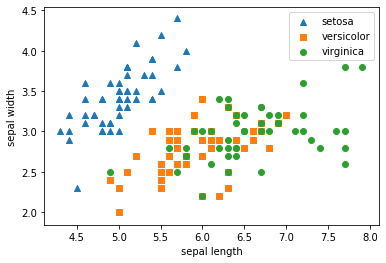

In [28]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 
#각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## scaling
여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향

In [29]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)

## 4차원 -> 2차원

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [31]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


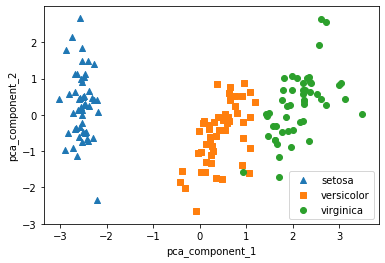

In [36]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

클러스터링 후 명확하게 분리됨.

In [54]:
#component별 차지하는 변동성 비율
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [62]:
#explained_variance_ratio_를 이용해서 적절한 차원 수 선택
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.75) + 1
print("선택할 차원 수:",d)

선택할 차원 수: 1


## randomforest로 비교
- 원래 데이터와,  pca한 데이터 비교

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#original data
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)

print('original data',scores)
print('mean score : ', np.mean(scores))

original data [0.98039216 0.92156863 0.97916667]
mean score :  0.960375816993464


In [64]:
#after pca
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )

print('pca data',scores_pca)
print('mean score : ', np.mean(scores_pca))

pca data [0.96078431 1.         1.        ]
mean score :  0.9869281045751634


# LDA(Linear Discriminant Analysis)
- Linear Discriminant Analysis
- 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법
- PCA는 비지도 학습, LDA는 지도학습
- 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
- 클래스 간 분산은 최대한 크게, 클래스 내부의 분산은 최대한 작게

![image](11.jpg)

![image](https://www.dtreg.com/uploaded/pageimg/LdaSepGood.jpg)

![image](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)

# LDA step

1. 클래스 내부와 클래스 간 분산 행렬을 구함
2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산 행렬을 Sb라고 하면 두 행렬을 고유벡터로 분해 가능
3. 고유값이 가장 큰 순으로 k개(LDA변환 차수만큼) 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 반환
![image](14.jpg)

# iris example

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 붓꽃 데이터 로드
iris = load_iris()

# 데이터 정규 스케일링
iris_scaled = StandardScaler().fit_transform(iris.data)

In [69]:
# 2개의 클래스로 구분하기 위한 LDA 생성
lda = LinearDiscriminantAnalysis(n_components = 2)

# fit()호출 시 target값 입력 
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
iris_lda.shape

(150, 2)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
lda_columns = ['lda_component_1','lda_component_2']

iris_lda_df = pd.DataFrame(iris_lda, columns = lda_columns)
iris_lda_df['target'] = iris.target

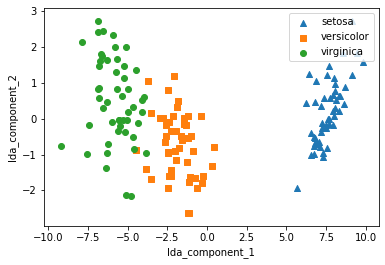

In [74]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^','s','o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers) :
    x_axis_data = iris_lda_df[iris_lda_df['target'] == i]['lda_component_1']
    y_axis_data = iris_lda_df[iris_lda_df['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend(loc = 'upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')

plt.show()

# SVD(Singlar Value Decomposition)
- PCA는 정방행렬만을 고유벡터로 분해
- SVD는 행과 열의 크기가 다른 행렬에도 적용

##### A(m x n) = (mxm)(mxn)(nxn)
$$A = U \Sigma V^T$$
- $\Sigma$는 대각행렬. 대각원소들이 A의 특이값(eigen value)
![image](333.jpg)

##### A(m x n) = (mxp)(pxp)(pxn)
일반적으로 $\Sigma$의 비대각 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 $\Sigma$에 대응되는 U와V 원소도 함께 제거해 차원을 줄임

![image](444.jpg)

# Truncated SVD
- $\Sigma$에 있는 대각원소, 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수 없다
- 하지만 데이터 정보가 압축되어 분해됨에도 상당한 수준으로 원본 행렬을 근사 가능
- 당연히 원래 차원의 차수에 가깝게 truncate할 수록 원본 행렬에 더 가깝게 복원

# SVD example

In [111]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)

In [112]:
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


## SVD 적용


In [113]:
#svd 파라미터로 원본 행렬 넣으면 U, sigma, Vt 행렬 반환
U, Sigma, Vt = svd(a)

#Sigma의 경우 0이 아닌 값만 반환하므로, 1차
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [114]:
print('U matrix : \n', np.round(U,3), '\n')
print('Sigma value : \n', np.round(Sigma,3), '\n')
print('V transpose matrix : \n', np.round(Vt,3))

U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]] 

Sigma value : 
 [3.423 2.023 0.463 0.079] 

V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


## 분해된 값을 다시 원래대로


In [115]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
sigma_mat = np.diag(Sigma)
sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [116]:
#U, Sigma, Vt 내적하여 원본 행렬 복원 : a_
a_ = np.dot(np.dot(U, sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [117]:
#원본 행렬 : a
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


## row vector dependent 한 경우

In [118]:
#세번째 row = 첫번재 row+두번째 row
a[2] = a[0] + a[1]

#네번째 row = 첫번째 row
a[3] = a[0]

print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [119]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [120]:
print('U matrix : \n', np.round(U,3), '\n')
print('Sigma value : \n', np.round(Sigma,3), '\n')
print('V transpose matrix : \n', np.round(Vt,3))

U matrix : 
 [[ 0.246  0.583 -0.071 -0.771]
 [-0.774 -0.017  0.551 -0.31 ]
 [-0.529  0.566 -0.551  0.31 ]
 [ 0.246  0.583  0.623  0.461]] 

Sigma value : 
 [2.663 0.807 0.    0.   ] 

V transpose matrix : 
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.703 -0.444  0.056  0.553]
 [-0.129  0.659 -0.606  0.426]]


Sigma 값 중 2개가 0. 선형 독립인 row vector는 2개 => 즉, Rank=2

## 분해된 값을 다시 원래대로
Sigma에서 0에 대응되는 값을 제외하고 복원

In [122]:
Sigma_ = np.diag(Sigma[:2])
print(np.round(Sigma_,3))

[[2.663 0.   ]
 [0.    0.807]]


In [121]:
#U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
print(np.round(U_,3))

[[ 0.246  0.583]
 [-0.774 -0.017]
 [-0.529  0.566]
 [ 0.246  0.583]]


In [123]:
#V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(np.round(Vt_,3))

[[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]]


In [125]:
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


# truncated SVD example - using scipy

Truncated SVD 를 이용한 행렬 분해


In [126]:
from scipy.sparse.linalg import svds #truncated SVD
from scipy.linalg import svd #일반 SVD

In [129]:
# 6X6 Random 원본 행렬 생성 
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n',matrix)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


## SVD 적용

In [133]:
#SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)


분해 행렬 차원: (6, 6) (6,) (6, 6)


In [132]:
print('\nSigma값 행렬:', Sigma)


Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]


## truncated SVD 적용
- 특이값 4

In [135]:
# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4

U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원 : ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)

print('\nTrucnated SVD Sigma값 행렬 : ', Sigma_tr)


Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Trucnated SVD Sigma값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]


## 분해된 값을 다시 원래대로

In [137]:
# SVD
Sigma_ = np.diag(Sigma)
np.dot(np.dot(U, Sigma_), Vt)
print('\nSVD로 분해 후 복원 행렬:\n', matrix)


SVD로 분해 후 복원 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


In [136]:
# truncated SVD
Sigma_tr_ = np.diag(Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,Sigma_tr_ ), Vt_tr)
print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)


Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


# truncated SVD example - using sklearn
- scipy처럼 $U, \Sigma, Vt$를 반환하지 않음

In [138]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

In [139]:
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TrucnatedSVD Component 2')

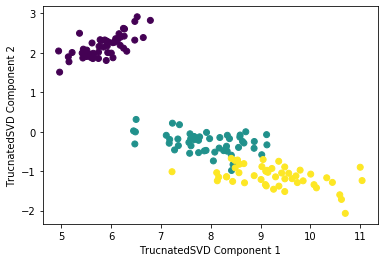

In [140]:
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(iris_tsvd[:,0], iris_tsvd[:,1], c = iris.target)
plt.xlabel('TrucnatedSVD Component 1')
plt.ylabel('TrucnatedSVD Component 2')

# truncatedSVD, PCA - after scaling


In [141]:
# iris 데이터를 StandardScaler로 변환
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

In [142]:
# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

In [143]:
# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

Text(0.5, 1.0, 'PCA Transformed')

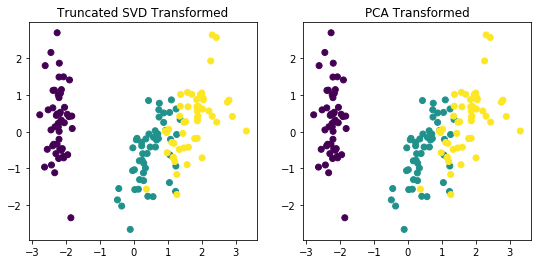

In [144]:
# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)

ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)

ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [107]:
#0에 가까운 값이므로 거의 비슷한 결과라고 할 수 있음
print((iris_pca - iris_tsvd).mean())

print((pca.components_ - tsvd.components_).mean())

2.3096860072661467e-15
-1.0408340855860843e-16


# 희소행렬(Sparse Matrix)

- 대부분 값이 0으로 채워진 행렬
- 너무 많은 불필요한 0 값으로 인해 메모리 낭비가 심함 
- 행렬의 크기가 커서 연산 시 시간도 많이 소모
- 따라서 이런 희소 행렬을 메모리 낭비가 적도록 변환

![image](희소.jpg)

- 이와 반대로 행렬의 값이 대부분 0이 아닌 값을 가지는 경우 밀집행렬(Dense matrix)
- SVD는 행렬을 분해할때, 일부 값이 작은 데이터를 잘라내어버릴 수도 있음
- 중요하지 않은 데이터를 행렬에서 직접 제거하여 행렬의 차원을 축소시키는 방법이기에 데이터 희소성의 문제를 해결 가능

# NMF(Non-Negative Matrix Factorization)
- Low-Rank Approximation
- 원본 행렬 내의 모든 원소 값이 모두 양수(0이상)이라는 게 보장되면 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법

![image](https://image.slidesharecdn.com/random-140422203039-phpapp01/95/pca-svd-nmf-23-638.jpg?cb=1398198791)

In [145]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

In [146]:
# 2개의 주요 component로 NMF변환
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)

iris_nmf = nmf.transform(iris_ftrs)
iris_nmf.shape

(150, 2)

Text(0, 0.5, 'NMF Component2')

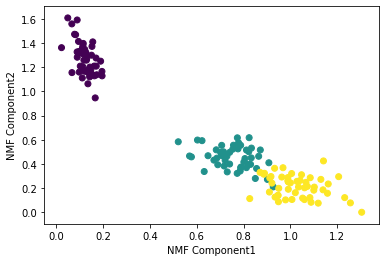

In [147]:
plt.scatter(iris_nmf[:,0], iris_nmf[:,1], c  = iris.target)
plt.xlabel('NMF Component1')
plt.ylabel('NMF Component2')